In [1]:
#install YOLOV8
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 618.9/618.9 kB 15.4 MB/s eta 0:00:0000:01


In [2]:
# Imports
from ultralytics import YOLO
import os
import shutil
import numpy as np
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

# Copy files from the input folder to the output folder to match YOLOV8's directory structure

# Create Training and Validation Sets

In [6]:
from sklearn.model_selection import train_test_split

# Set the path to your dataset directory containing images
img_dataset_directory = '/kaggle/input/wcebleedgen/bleeding/Images'
#lbl_dataset_directory = '/kaggle/input/wcebleedgen/bleeding/Bounding boxes/YOLO_TXT'
lbl_dataset_directory = '/kaggle/input/yolo-dataset-multi-instances/YOLO_boxes' # use generated multi-instanceYOLO boxes
# Set the path to the directory where you want to save the training and validation sets
img_output_directory = '/kaggle/working/datasets/wcebleedgen/images'
lbl_output_directory = '/kaggle/working/datasets/wcebleedgen/labels'
# Specify the size of the validation set (e.g., 20%)
validation_size = 0.2

# Create the output directory if it doesn't exist
os.makedirs(img_output_directory, exist_ok=True)
os.makedirs(lbl_output_directory, exist_ok=True)

# List all image filenames in the dataset directory
image_filenames = sorted(os.listdir(img_dataset_directory))
label_filenames = sorted(os.listdir(lbl_dataset_directory))

# Split the dataset into training and validation sets
train_filenames, val_filenames = train_test_split(image_filenames, test_size=validation_size, random_state=None)

# Copy images to the training and validation directories
'''for filename in train_filenames:
    img_source_path = os.path.join(img_dataset_directory, filename)
    img_destination_path = os.path.join(img_output_directory, 'train', filename)
    
    lbl_filename = filename[:-3]+'txt'
    lbl_source_path = os.path.join(lbl_dataset_directory, lbl_filename)
    lbl_destination_path = os.path.join(lbl_output_directory, 'train', lbl_filename)
    
    os.makedirs(os.path.dirname(img_destination_path), exist_ok=True)
    shutil.copy(img_source_path, img_destination_path)
    
    os.makedirs(os.path.dirname(lbl_destination_path), exist_ok=True)
    shutil.copy(lbl_source_path, lbl_destination_path)'''

# We only need the validation set
val_out_dir = '/kaggle/working/datasets'

for filename in val_filenames:
    img_source_path = os.path.join(img_dataset_directory, filename)
    img_destination_path = os.path.join(val_out_dir, 'val', 'images', filename)
    
    lbl_filename = filename[:-3]+'txt'
    lbl_source_path = os.path.join(lbl_dataset_directory, lbl_filename)
    lbl_destination_path = os.path.join(val_out_dir, 'val', 'labels', lbl_filename)
    
    os.makedirs(os.path.dirname(img_destination_path), exist_ok=True)
    shutil.copy(img_source_path, img_destination_path)
    
    os.makedirs(os.path.dirname(lbl_destination_path), exist_ok=True)
    shutil.copy(lbl_source_path, lbl_destination_path)

print(f"Dataset split into training and validation sets. Training set: {len(train_filenames)} images, Validation set: {len(val_filenames)} images.")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Dataset split into training and validation sets. Training set: 1047 images, Validation set: 262 images.


In [65]:
# Check the sizes of train/val folders
print(len(os.listdir('/kaggle/working/datasets/val/images')))
print(len(os.listdir('/kaggle/working/datasets/wcebleedgen/images')))

**Resume training a previously trained pre-trained model**

**Train a pre-trained model from scratch**

In [9]:
# Hyperparameters
IMG_RES = int(224 * 2.5) # train at 2.5 X the image resolution
BATCH_SIZE = -1
EPOCHS = 150
PATIENCE = 10
DEVICE=0
NAME="YOLO_v8n_150_epochs_1"

In [10]:
#from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
data_path='../input/wcebleedgen-yaml-file/wcbleedgen.yaml'
results = model.train(
                    data=data_path,
                    epochs=EPOCHS,
                    imgsz=IMG_RES,
                    batch=BATCH_SIZE,
                    patience=PATIENCE,
                    device=DEVICE,
                    name=NAME
                )


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=448
AutoBatch: CUDA:0 (Tesla P100-PCIE-16GB) 15.90G total, 0.10G reserved, 0.06G allocated, 15.74G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3011043       4.015         0.189         81.58         34.14        (1, 3, 448, 448)                    list
     3011043        8.03         0.195         20.27         32.26        (2, 3, 448, 448)                    list
     3011043       16.06         0.323         22.15          28.5        (4, 3, 448, 448)                    list
     3011043       32.12         0.591         20.54         30.69        (8, 3, 448, 448)                    list
     3011043       64.24         1.091          20.7         37.22       (16, 3, 448, 448)                    list
AutoBatch: Using batch-si

lr/pg0,███▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg1,███▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
lr/pg2,███▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁
metrics/mAP50(B),▁▃▄▅▆▆▆▇▇▇▇▇▇███████████████████████████
metrics/mAP50-95(B),▁▂▃▃▄▄▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇▇██████████████████
metrics/precision(B),▁▃▅▅▅▅▆▇▇▆▇▇▇█▇██▇██████████████████████
metrics/recall(B),▁▂▃▄▄▅▅▅▆▇▇▇▇▇▇▇▇███████████████████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▆▆▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁


# Make Predictions

In [25]:
# Make predictions on the test sets
best_model_path = '/kaggle/working/runs/YOLO_v8n_150_epochs_1/weights/best.pt'
test_dir = '/kaggle/input/wcebleedgen-test-set/Test_Dataset_2'
test_set = sorted(os.listdir(test_dir))

model = YOLO(best_model_path)
results = []

for file in test_set:
    img = os.path.join(test_dir, file)
    results.append(model.predict(source=img,conf=0.25))


pred_boxes = []
for result in results:
    for res in result:
        pred_boxes.append( res.boxes )


image 1/1 /kaggle/input/wcebleedgen-small/WCEBleedGen_abrdg/Images/img- (1).png: 576x576 1 bleed, 8.6ms
Speed: 2.3ms preprocess, 8.6ms inference, 1.9ms postprocess per image at shape (1, 3, 576, 576)

image 1/1 /kaggle/input/wcebleedgen-small/WCEBleedGen_abrdg/Images/img- (10).png: 576x576 1 bleed, 6.7ms
Speed: 1.6ms preprocess, 6.7ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 576)

image 1/1 /kaggle/input/wcebleedgen-small/WCEBleedGen_abrdg/Images/img- (100).png: 576x576 1 bleed, 5.1ms
Speed: 1.5ms preprocess, 5.1ms inference, 1.1ms postprocess per image at shape (1, 3, 576, 576)

image 1/1 /kaggle/input/wcebleedgen-small/WCEBleedGen_abrdg/Images/img- (1000).png: 576x576 2 bleeds, 5.0ms
Speed: 1.6ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 576)

image 1/1 /kaggle/input/wcebleedgen-small/WCEBleedGen_abrdg/Images/img- (1001).png: 576x576 1 bleed, 5.0ms
Speed: 1.5ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1

In [26]:
# get boxes and confidence levels
conf_levels = []
boxes = []
for preds in pred_boxes:
    if preds.conf.shape[0] == 0:
        conf_levels.append(None)
        boxes.append(None)
        continue
    cf = preds.conf[0].cpu().numpy()
    bx = preds.xyxy[0].cpu().numpy()
    
    conf_levels.append(cf)
    boxes.append(bx)

In [45]:
# Write the predictions to file
import csv

# Specify the file name for the CSV file
csv_filename = 'Detection_results_Test_set_1.csv'
#csv_filename = 'Detection_results_Test_set_2.csv'
images = []
# Open the CSV file in write mode
with open(csv_filename, 'w', newline='') as csv_file:
    # Create a CSV writer object
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(["Image", "BBox [x_,y_,x^,y^]", "conf"])
    
    # Use zip to iterate over both lists simultaneously and write them to the CSV file
    for item1, item2, item3 in zip(test_set, boxes, conf_levels):
        print(item1, item2, item3)
        images.append(item1)
        csv_writer.writerow([item1, item2, item3])

print(f'CSV file "{csv_filename}" has been created with corresponding elements from both lists.')


img- (1).png [     158.33      104.93      203.22      165.28] 0.845454
img- (10).png [     94.172      157.44      223.05      223.89] 0.85721636
img- (100).png [      48.93      89.544      150.69       161.8] 0.8981673
img- (1000).png [     159.84      71.045      207.35      118.88] 0.9126921
img- (1001).png [     38.595      1.0066      88.599      65.639] 0.8897727
img- (1002).png [     127.51      17.525      191.19      81.323] 0.91223305
img- (1003).png [     64.319      25.999      91.921       64.78] 0.8921314
img- (1004).png [     154.72      10.637      215.42      88.346] 0.90136796
img- (1005).png [     78.237      16.525      145.69      106.85] 0.91198194
img- (1006).png [     117.42      53.145      152.11      100.05] 0.8922183
img- (1007).png [     33.798     0.44448      82.429      90.865] 0.9143655
img- (1008).png [     12.856     0.87579      80.527      84.562] 0.9412937
img- (1009).png [     19.619     0.26794      78.008      59.698] 0.9056662
img- (101).png 

In [28]:
# Get the valid (non-empty) predictions sorted by the confidence levels
valid_boxes = []
valid_conf_levels = []
valid_images = []
for img, box, cf in zip(images, boxes, conf_levels):
    if np.any(box) == None:
        continue
    valid_boxes.append(box)
    valid_conf_levels.append(cf)
    valid_images.append(img)
    
print(len(valid_boxes))
indxs = np.argsort(valid_conf_levels)[::-1]

1309


**Display the Predicted Images**

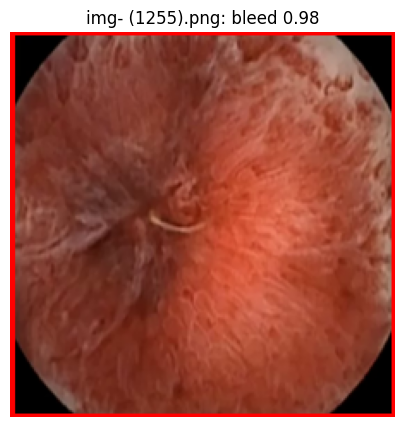

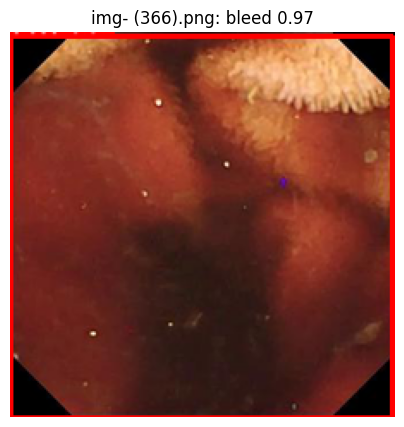

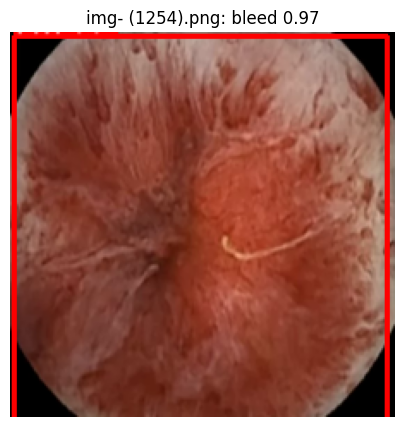

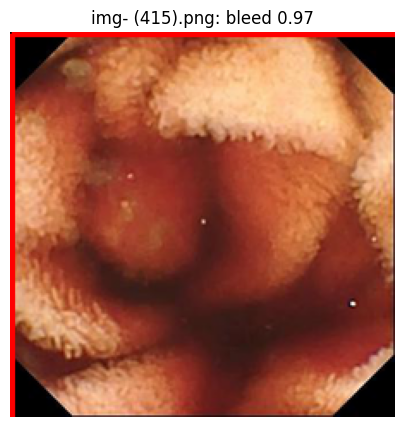

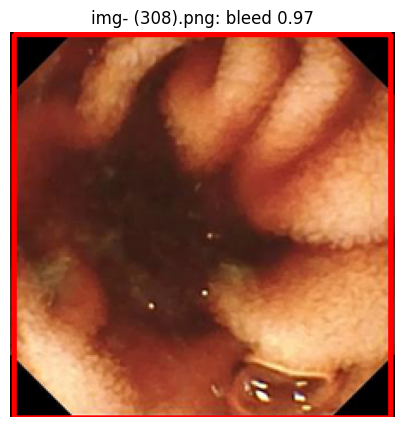

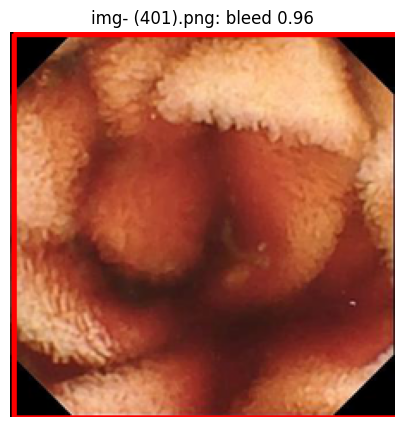

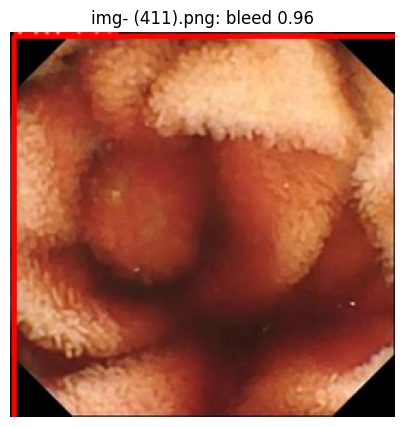

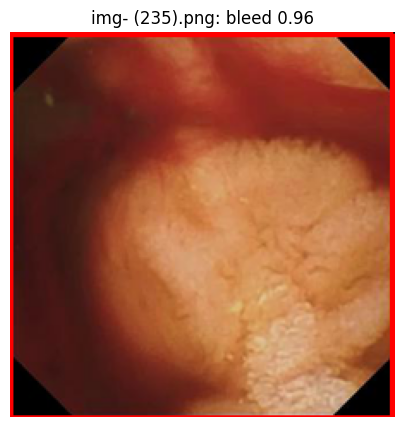

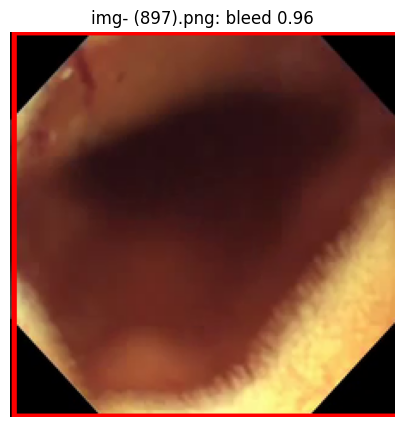

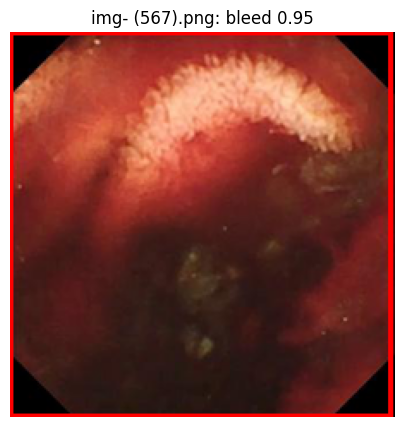

In [68]:
#print(pred_boxes[14])
#print(pred_boxes[14].conf.shape[0] == 0)
#cf_lvl = pred_boxes[0].conf[0].cpu().numpy()
#pb = pred_boxes[0].xyxy[0].cpu().numpy()
for i in range(10): # Visualize the best 10 detections
    indx = indxs[i]
    valid_box = valid_boxes[indx]
    valid_conf_level = valid_conf_levels[indx]
    img_file = os.path.join(test_dir, valid_images[indx])

    #print(pb, cf_lvl)
    visualize(img_file, [valid_box], "bleed "+ str(f"{valid_conf_level:.2f}"))

In [18]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35,
        color=TEXT_COLOR,
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image_file, bboxes, class_name):
    image = cv2.cvtColor(cv2.imread(image_file), cv2.COLOR_BGR2RGB)
    img = image.copy()
    for bbox in bboxes:
        img = visualize_bbox(img, bbox, class_name)
    plt.figure(figsize=(5, 5))
    title = image_file.split("/")
    plt.title(f"{title[-1]}: {class_name}")
    plt.axis('off')
    plt.imshow(img)

# Calculate IoU

In [60]:
def calculate_iou(box1, box2):
    """
    Calculate IoU (Intersection over Union) between two bounding boxes.

    Args:
        box1: List or tuple of [x1, y1, x2, y2] coordinates of the first box.
        box2: List or tuple of [x1, y1, x2, y2] coordinates of the second box.

    Returns:
        IoU: Intersection over Union value between the two boxes.
    """
    print(box1)
    print(box2)
    x1, y1, x2, y2 = box1
    x3, y3, x4, y4 = box2

    # Calculate the intersection area
    intersection_area = max(0, min(x2, x4) - max(x1, x3)) * max(0, min(y2, y4) - max(y1, y3))

    # Calculate the areas of each bounding box
    area_box1 = (x2 - x1) * (y2 - y1)
    area_box2 = (x4 - x3) * (y4 - y3)

    # Calculate IoU
    iou = intersection_area / float(area_box1 + area_box2 - intersection_area)

    return iou

In [61]:
# Calculate mean IoU

def calculate_mean_iou(ground_truth_boxes, predicted_boxes):
    """
    Calculate the mean IoU (Intersection over Union) over a dataset.

    Args:
        ground_truth_boxes: List of lists/tuples of ground truth bounding boxes for each image.
        predicted_boxes: List of lists/tuples of predicted bounding boxes for each image.

    Returns:
        mean_iou: Mean IoU value over the entire dataset.
    """
    total_iou = 0.0
    total_samples = 0

    for image_gt_boxes, image_pred_boxes in zip(ground_truth_boxes, predicted_boxes):
        for gt_box in image_gt_boxes:
            for pred_box in image_pred_boxes:
                iou = calculate_iou(gt_box, pred_box)
                total_iou += iou
                total_samples += 1

    mean_iou = total_iou / total_samples

    return mean_iou

In [50]:
# Get the ground truth bounding boxes
ground_truth_boxes = []
box_dir = '/kaggle/input/wcebleedgen-small/WCEBleedGen_abrdg/Labels'
box_files = sorted(os.listdir(box_dir))
for file in box_files:
    box_file = os.path.join(box_dir, file)
    with open(box_file) as f:
        #print(f'{file}: {f.readline()}')
        #box = f.readline().split()[1:]
        box = np.loadtxt(f, dtype=float)
        #print(f'{file}: {box}')
        ground_truth_boxes.append(box[1:])

#len(ground_truth_boxes)

In [67]:
predicted_boxes = valid_boxes

# Calculate the mean IoU for the entire dataset
mean_iou = calculate_mean_iou(ground_truth_boxes, predicted_boxes)

# Print the mean IoU value
print("Mean IoU:", mean_iou)